In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from statsmodels.sandbox.stats.multicomp import multipletests
import pandas as pd


%matplotlib inline

# Task 4


In [3]:
data4 = pd.read_csv('./wine.csv', header=None)
data4= data4[1]

In [4]:
sample4 = np.array(data4)
sample4

array([ 14.23,  13.2 ,  13.16,  14.37,  13.24,  14.2 ,  14.39,  14.06,
        14.83,  13.86,  14.1 ,  14.12,  13.75,  14.75,  14.38,  13.63,
        14.3 ,  13.83,  14.19,  13.64,  14.06,  12.93,  13.71,  12.85,
        13.5 ,  13.05,  13.39,  13.3 ,  13.87,  14.02,  13.73,  13.58,
        13.68,  13.76,  13.51,  13.48,  13.28,  13.05,  13.07,  14.22,
        13.56,  13.41,  13.88,  13.24,  13.05,  14.21,  14.38,  13.9 ,
        14.1 ,  13.94,  13.05,  13.83,  13.82,  13.77,  13.74,  13.56,
        14.22,  13.29,  13.72,  12.37,  12.33,  12.64,  13.67,  12.37,
        12.17,  12.37,  13.11,  12.37,  13.34,  12.21,  12.29,  13.86,
        13.49,  12.99,  11.96,  11.66,  13.03,  11.84,  12.33,  12.7 ,
        12.  ,  12.72,  12.08,  13.05,  11.84,  12.67,  12.16,  11.65,
        11.64,  12.08,  12.08,  12.  ,  12.69,  12.29,  11.62,  12.47,
        11.81,  12.29,  12.37,  12.29,  12.08,  12.6 ,  12.34,  11.82,
        12.51,  12.42,  12.25,  12.72,  12.22,  11.61,  11.46,  12.52,
      

In [5]:
def inversions_criterion(sample):
    x = np.array(sample)
    n = len(x)
    
    upper_triangular = np.arange(n).reshape((-1, 1)) < np.arange(n).reshape((1, -1))
    x_upper_triangular = x.reshape((-1, 1)) > x.reshape((1, -1))
    I = (x_upper_triangular * upper_triangular).sum()
    print(I)
    mean = n * (n - 1) / 4
    var = (2 * n ** 3 + 3 * n ** 2 - 5 * n) / 72
    T = (I - mean) / np.sqrt(var)
    return T, 2 * sps.norm.sf(np.abs(T))

In [6]:
len(sample4)

178

In [7]:
inversions_criterion(sample4)

9647


(4.4546331437965652, 8.4036764900643946e-06)

Без поправки на множественную проверку гипотез, наша уверенно отвергается, то есть это не случайный набор данных

## Теперь возьмем и посмотрим на критерии проверки нормальности выборки

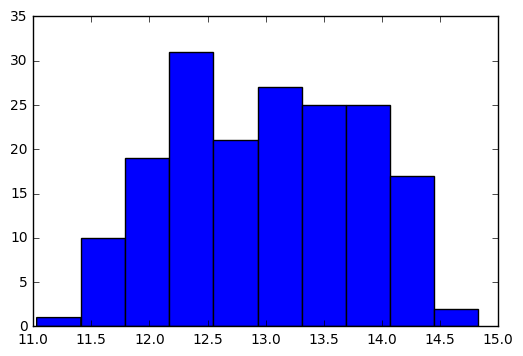

In [8]:
plt.hist(sample4)
plt.show()

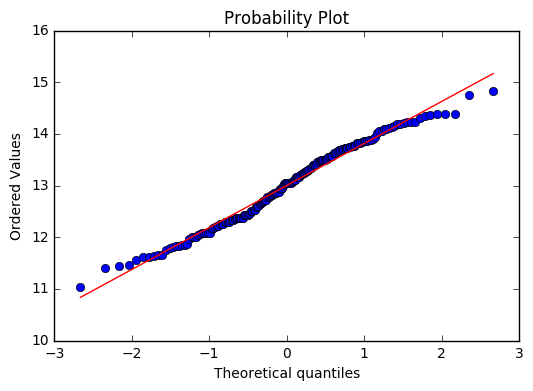

In [9]:
sps.probplot(sample4, plot=plt)
plt.show()

Похоже, она не нормальная, а с тяжелыми хвостами

In [76]:
from statsmodels.stats.diagnostic import normal_ad

In [77]:
import statsmodels.api as sm

In [79]:
p_vals = []

In [80]:
sps.shapiro(sample4)[1]

0.02005171775817871

In [81]:
sps.shapiro(sample4) # Уверенно отвергаем
p_vals.append(sps.shapiro(sample4)[1])

In [82]:
p_vals.append(normal_ad(sample4)[1])

In [83]:
sps.anderson(sample4) # На уровне 0.05 отвергается

AndersonResult(statistic=1.033535193740903, critical_values=array([ 0.564,  0.642,  0.77 ,  0.899,  1.069]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [84]:
p_vals.append(sps.jarque_bera(sample4)[1])

In [85]:
p_vals.append(sps.skewtest(sample4)[1])

In [86]:
p_vals.append(sps.stats.normaltest(sample4)[1])

In [87]:
sps.stats.normaltest(sample4)

NormaltestResult(statistic=15.963552699056713, pvalue=0.00034163202531285264)

In [88]:
p_vals.append(sm.stats.lillifors(sample4)[1])

In [89]:
p_vals.append(inversions_criterion(sample4)[1])

9647


In [90]:
p_vals

[0.02005171775817871,
 0.0099319956717432781,
 0.061067754785150585,
 0.77291639264736622,
 0.00034163202531285264,
 0.044047851348353768,
 8.4036764900643946e-06]

In [91]:
multipletests(p_vals, method='holm')

(array([False,  True, False, False,  True, False,  True], dtype=bool),
 array([  8.02068710e-02,   4.96599784e-02,   1.32143554e-01,
          7.72916393e-01,   2.04979215e-03,   1.32143554e-01,
          5.88257354e-05]),
 0.0073008319790146547,
 0.0071428571428571435)

Отвергается Случайность, а так же 2 гипотезы о нормальности(ну нам нужна хотя бы одна), Значит выборка не из нормального распределения!

Раз характер неизвестен, то используем метод Холма, ведь он в этом случае неулучшаем)


# Task 5

In [95]:
data1 = pd.read_csv('./slump_test.data.csv')
data2 = pd.read_csv('./vowel-context.data.csv', sep=' ', header=None)
data3 = pd.read_csv('./wine.csv', header=None)

In [96]:
samples = []
samples.append(np.array(data1['Compressive Strength (28-day)(Mpa)']))
samples.append(np.array(data2[7]))
samples.append(np.array(data3[4]))
samples.append(np.array(data3[1]))
samples.append(np.array(data3[3]))
samples.append(np.array(data3[8]))
samples.append(np.array(data3[9]))

In [97]:
hypothesis_tests = [sps.shapiro, sps.stats.normaltest, sm.stats.lillifors, normal_ad]
p_vals_5_task = []
for sample in samples:
    for hypo_test in hypothesis_tests:
        p_vals_5_task.append(hypo_test(sample)[1])

In [98]:
res = multipletests(p_vals_5_task, method='fdr_by')
multipletests(p_vals_5_task)

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,
        False, False,  True, False,  True,  True, False, False, False, False], dtype=bool),
 array([  8.75386499e-01,   8.75386499e-01,   8.75386499e-01,
          8.75386499e-01,   6.49594939e-01,   7.71416356e-01,
          6.49594939e-01,   6.49594939e-01,   7.99833777e-01,
          7.99833777e-01,   6.49594939e-01,   7.99833777e-01,
          3.33096312e-01,   8.50587844e-03,   5.35041049e-01,
          1.97157106e-01,   5.08435163e-01,   5.04825646e-01,
          7.71416356e-01,   6.49594939e-01,   2.74007579e-03,
          6.20308514e-02,   1.55201108e-04,   4.20335315e-04,
          2.63418777e-01,   1.68695238e-01,   7.71416356e-01,
          6.49594939e-01]),
 0.0018302264601395279,
 0.0017857142857142859)

In [99]:
res[0].reshape((len(res[0]) / 4, 4))

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False,  True, False, False],
       [False, False, False, False],
       [ True, False,  True,  True],
       [False, False, False, False]], dtype=bool)

Говорят, что предпоследний датасет ненормален, а так же 4. Посмотрим на них

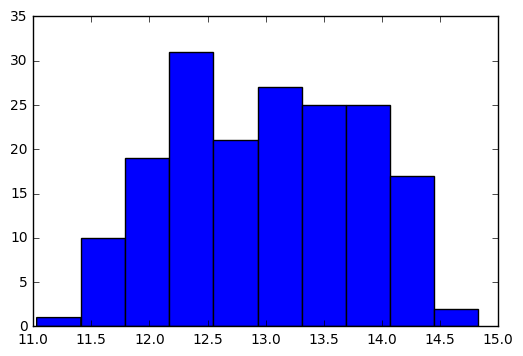

In [27]:
plt.hist(samples[3])
plt.show()# и вправду

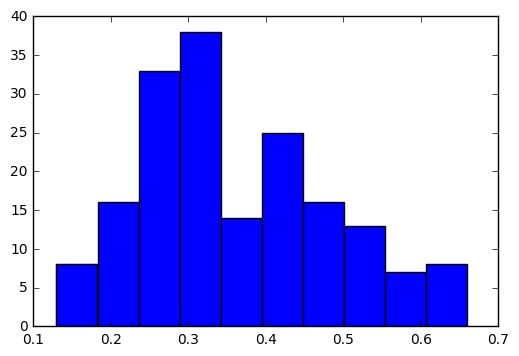

In [100]:
plt.hist(samples[5])
plt.show() # Тут виден right skewed

В нашем случае нельзя использовать метод Бенджамини-Хохберга, т.к. про независимость мы вообще ничего не знаем, а про монотонность условной пероятности при условии значения статистики что-то очень тяжело сказать, скорее всего, ее не будет, ведь мы взяли вообще совсем разные данные

# Task 6 

In [29]:
def inversions_criterion(sample):
    x = np.array(sample)
    n = len(x)
    
    upper_triangular = np.arange(n).reshape((-1, 1)) < np.arange(n).reshape((1, -1))
    x_upper_triangular = x.reshape((-1, 1)) > x.reshape((1, -1))
    I = (x_upper_triangular * upper_triangular).sum()
    print(I)
    mean = n * (n - 1) / 4
    var = (2 * n ** 3 + 3 * n ** 2 - 5 * n) / 72
    T = (I - mean) / np.sqrt(var)
    return T, 2 * sps.norm.sf(np.abs(T))

In [30]:
data6 = pd.read_csv('./sample0.csv', header=None)
data6 = np.array(data6[0])
data6

array([34, 35, 20, 31, 31, 33, 34, 34, 33, 35, 35, 33, 22, 24, 28, 31, 31,
       32, 33, 31, 33, 31, 31, 30, 27, 26, 28, 28, 30, 27, 26, 24, 26, 27,
       27, 27, 29, 31, 29, 26, 29, 27, 27, 28, 26, 22, 23, 25, 25, 21, 23,
       15, 18, 16, 16, 19, 18, 15, 15, 19, 21, 25, 22, 24, 21, 18, 20, 22,
       19, 14, 14, 19, 15, 14,  6, 12, 10,  9,  9, 12, 12, 11, 16, 11,  9,
        7, 11,  7,  8, 10,  8,  6,  4,  7, 14, 10, 10, 16, 19, 21, 23, 11,
       13, 14, 12,  5,  1,  2,  4, 11,  5,  4,  6,  7,  2,  9,  7,  2, 10,
        7,  1, -3])

In [31]:
len(data6)

122

In [32]:
inversions_criterion(data6)

6321


(11.642125599602776, 2.5166425354199873e-31)

In [33]:
import random


In [34]:
import scipy.stats.stats

In [52]:
def inversions_stat(sample):
    x = np.array(sample)
    n = len(x)
    
    upper_triangular = np.arange(n).reshape((-1, 1)) < np.arange(n).reshape((1, -1))
    x_upper_triangular = x.reshape((-1, 1)) > x.reshape((1, -1))
    I = (x_upper_triangular * upper_triangular).sum()
    mean = n * (n - 1) / 4
    var = (2 * n ** 3 + 3 * n ** 2 - 5 * n) / 72
    T = (I - mean) / np.sqrt(var)
    return T

In [53]:
"""

Skid Marks: Check for runs in sequences
----------------------------------------

Q: how do you check for runs?
A: look for skidmarks.

This module implements some functions to check a sequence for randomness.
in some cases, it is assumed to be a binary sequence (not only 1's and 0's
but containing only 2 distinct values.
Any feedback or improvements are welcomed

    >>> from skidmarks import gap_test, wald_wolfowitz, auto_correlation, serial_test

"""

import math
from scipy.stats import linregress, chisquare
from scipy.special import ndtr
from itertools import groupby
import numpy as np
import collections

def wald_wolfowitz(sequence):
    """
    implements the wald-wolfowitz runs test:
    http://en.wikipedia.org/wiki/Wald-Wolfowitz_runs_test
    http://support.sas.com/kb/33/092.html

    :param sequence: any iterable with at most 2 values. e.g.
                     '1001001'
                     [1, 0, 1, 0, 1]
                     'abaaabbba'

    :rtype: a dict with keys of 
        `n_runs`: the number of runs in the sequence 
        `p`: the support to reject the null-hypothesis that the number of runs 
             supports a random sequence
        `z`: the z-score, used to calculate the p-value 
        `sd`, `mean`: the expected standard deviation, mean the number of runs, 
                      given the ratio of numbers of 1's/0's in the sequence

    >>> r = wald_wolfowitz('1000001')
    >>> r['n_runs'] # should be 3, because 1, 0, 1
    3

    >>> r['p'] < 0.05 # not < 0.05 evidence to reject Ho of random sequence
    False

    # this should show significance for non-randomness
    >>> li = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
    >>> wald_wolfowitz(li)['p'] < 0.05
    True

    """
    R = n_runs = sum(1 for s in groupby(sequence, lambda a: a))

    n = float(sum(1 for s in sequence if s == sequence[0]))
    m = float(sum(1 for s in sequence if s != sequence[0]))

    # expected mean runs
    ER = ((2 * n * m ) / (n + m)) + 1
    # expected variance runs
    VR = (2 * n * m * (2 * n * m - n - m )) / ((n + m)**2 * (n + m - 1)) 
    O = (ER - 1) * (ER - 2) / (n + m - 1.)
    assert VR - O < 0.001, (VR, O)

    SD = math.sqrt(VR)
    # Z-score
    Z = (R - ER) / SD

    return {'z': Z, 'mean': ER, 'sd': SD, 'p': ndtr(Z), 'n_runs': R}


In [54]:
wald_wolfowitz('10001000101')

{'mean': 6.090909090909091,
 'n_runs': 7,
 'p': 0.73563333743928494,
 'sd': 1.443137078762504,
 'z': 0.6299407883487121}

In [55]:
from tqdm import tqdm

Сгенериурем много выборок размера len(data6) = 122 и для них будем считать и инверсии и wald_wolfowitz статистики

In [57]:
inversion_stats = []
wald_stats = []
for i in tqdm(range(50000)):
    cur_sample = sps.norm.rvs(size=len(data6))
    cur_T = inversions_stat(cur_sample)
    cur_wald = wald_wolfowitz(''.join(((map(lambda elem: str(int(elem)),(cur_sample - np.median(cur_sample) >= 0))))))['z']
    inversion_stats.append(cur_T)
    wald_stats.append(cur_wald)

100%|██████████| 50000/50000 [00:25<00:00, 1941.83it/s]


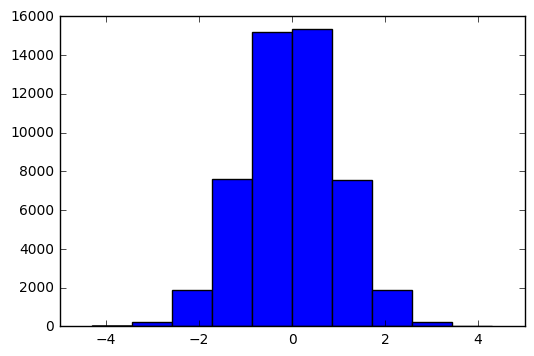

In [58]:
plt.hist(inversion_stats)
plt.show()

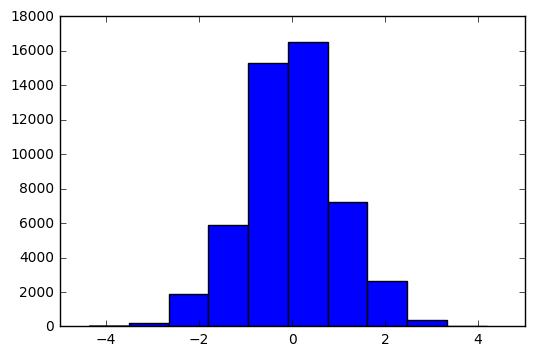

In [59]:
plt.hist(wald_stats)
plt.show()

Даже неплохо выглядит)))


Должно получаться в пределе $\mathcal{N}(0,1)$

In [60]:
np.mean(inversion_stats)

-0.0013609403618619483

In [61]:
np.var(inversion_stats)

0.99240206659723873

In [62]:
np.mean(wald_stats)

-0.0039237703653222907

In [63]:
np.var(wald_stats)

1.000336565774754

Все ок))


Теперь найдем критические значения для уровня значимости $\alpha = 0.05$. Просто возьмем выборочную квантиль уровня 0.25 и 0.975 ведь у нас двусторонняя альтернатива

In [64]:
inver_extreme = [np.percentile(inversion_stats, 0.025), np.percentile(inversion_stats, 0.975)]
wald_extreme = [np.percentile(wald_stats, 0.025), np.percentile(wald_stats, 0.975)]

In [65]:
inver_extreme, wald_extreme

([-3.454358742678413, -2.3036405149565651],
 [-3.2728390442910671, -2.3637170875435487])

Примерно одинаковые критические значения, чего и следовало ожидать

То есть, если вот критерий  $$\lbrace T \geq right \rbrace \cup \lbrace T \leq left \rbrace $$

Настало время протетстить нашу выборку на этих гипотезах

In [68]:
inversions_stat(data6)

11.642125599602776

In [69]:
wald_wolfowitz(''.join(((map(lambda elem: str(int(elem)),(data6 - np.median(data6) >= 0))))))['z']

-9.082909171650853

Оба критерия отвергают гипотезу случанойсти!

Можем проверить еще множественную гипотезу на уровне 0.1(Cделаем поправку методом Бонферрони, у нас 2 критерия, каждый на уровне значимости, 0.05 проверяется)

In [101]:
inversions_criterion(data6)

6321


(11.642125599602776, 2.5166425354199873e-31)

In [105]:
wald_p_val = wald_wolfowitz(''.join(((map(lambda elem: str(int(elem)),(data6 - np.median(data6) >= 0))))))['p']

In [107]:
multipletests([inversions_criterion(data6)[1], wald_p_val], alpha=0.1, method='bonferroni')

6321


(array([ True,  True], dtype=bool),
 array([  5.03328507e-31,   1.05710825e-19]),
 0.051316701949486232,
 0.05)

Обе отвергаются опять же